In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
wait_times = pd.read_csv('../data/all_wait_times.csv')

In [3]:
wait_times = wait_times.melt(id_vars=['poe_id','iter'], value_name='wait time' )
wait_times['poe'] = wait_times['poe_id'].map({0: 'San Ysidro', 1: 'Otay Mesa', 2: 'Tecate'})
wait_times['period'] = wait_times['variable'].str.split('_').str[-1].astype(int)
wait_times['lane_type'] = wait_times['variable'].str.split('_').str[0]
wait_times = wait_times[
    (wait_times['wait time'] < 999)
]

# Wait Times by Lane Type and POE 

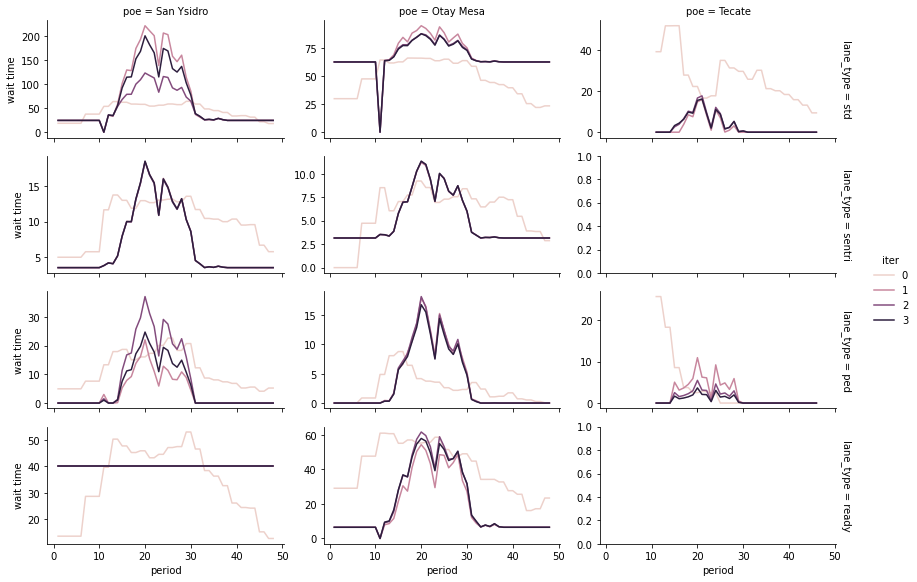

In [4]:
sns.relplot(
    data=wait_times, x='period', y='wait time', hue='iter', row='lane_type', col='poe', kind='line',
    facet_kws={"margin_titles": True, 'sharey' : False}, aspect=2, height=2,)

# Volumes by Lane Type and POE

In [7]:
vol_dfs = pd.read_csv('../data/all_vol_dfs.csv')

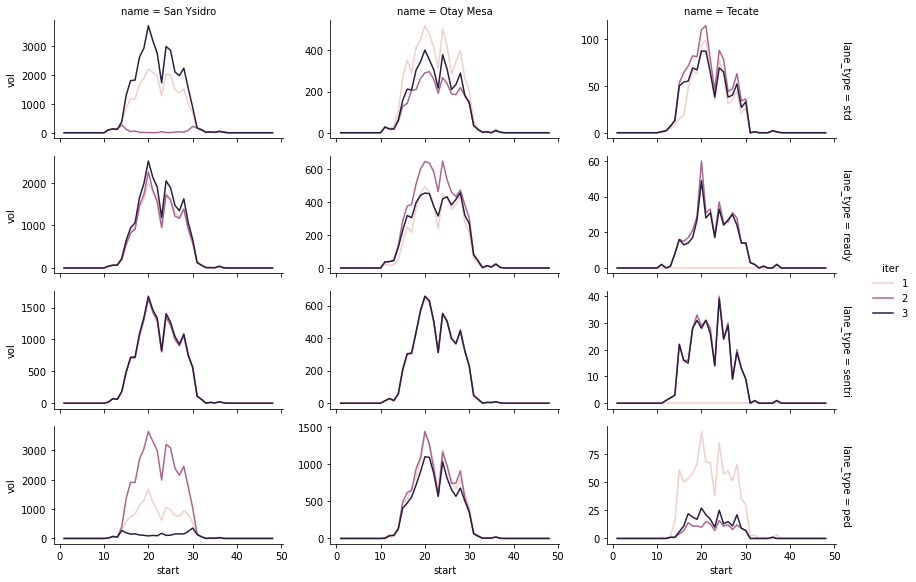

In [9]:
sns.relplot(
    data=vol_dfs, x='start', y='vol', hue='iter', row='lane_type', col='name', kind='line',
    facet_kws={"margin_titles": True, 'sharey' : False}, aspect=2, height=2,)